# Mission to Mars Web Scrapping Project

In [6]:
# Import Dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd 
from IPython.display import Image
from IPython.core.display import HTML
from tabula import read_pdf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pyqtgraph as pg
import six

In [2]:
# Set chromedirver path
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

# NASA Mars News

In [3]:
# Set url and browser
url = 'https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest'
browser.visit(url)

In [4]:
# Iterate through all pages
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Retrieve title information
    Headers = soup.find(class_="content_title")
    # Retrieve paragraph information
    Paragraph = soup.find(class_="article_teaser_body")

In [266]:
# Print First Article Header
Headers = print(Headers.text)
Headers

NASA Updates Mars 2020 Mission Environmental Review


In [5]:
# Print First Article Paragraph 
print(Paragraph.text)

NASA and the Department of Energy have completed a more detailed risk analysis for the Mars 2020 rover launch from Florida.


# Mars Space Images

In [6]:
# Set url and browser
url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)

In [7]:
# Iterate through all pages
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Retrieve Mars Photo
    featured_image_url = soup.findAll(class_='button fancybox')
    # Retrieve Image link
    for link in featured_image_url:
        image = (f"https://www.jpl.nasa.gov{link.get('data-fancybox-href')}")
        print(image)

https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA19980_ip.jpg


In [8]:
Image(url=image)

# Mars Weather

In [9]:
# Set url and browser
url = 'https://twitter.com/marswxreport?lang=en'
browser.visit(url)

In [10]:
# Iterate through all pages
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Retrieve Weather Data
    Title = soup.find(class_='TweetTextSize TweetTextSize--normal js-tweet-text tweet-text')

In [11]:
# Display Weather
Weather = Title.text
Weather

'InSight sol 353 (2019-11-24) low -100.6ºC (-149.1ºF) high -23.3ºC (-10.0ºF)\nwinds from the SSE at 5.8 m/s (13.1 mph) gusting to 21.4 m/s (47.9 mph)\npressure at 6.70 hPapic.twitter.com/NPmuRAuvQ7'

# Mars Facts

In [3]:
# Set url
url = 'https://space-facts.com/mars/'
# Retrieve Table
table = pd.read_html(url)
# Read Table
table

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:    -153 to 20 °C      -88 to 58°C,
           

In [4]:
# Create Facts Table
facts = table[0]
# Assign rows
facts.row = ['Equatorial Diameter', 'Polar Diameter', 'Mass',\
             'Moons', 'Orbit Distance', 'Orbit Period', 'Surface Temperature',\
             'First Record', 'Recorded By']
# Set Columns
facts.columns = ['Facts', 'Data']
# Display Table
facts

C:\Users\mldeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Facts,Data
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [15]:
facts_html = facts.to_html()
facts_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Facts</th>\n      <th>Data</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>

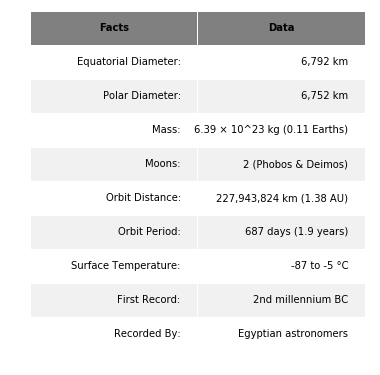

In [12]:
# Create saveable image of data
def render_mpl_table(data, col_width=80.0, row_height=0.625, font_size=10,
                     header_color='grey', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(facts, header_columns=0, col_width=3.0)

# Save the Figure
plt.savefig('facts.png')

# Mars Hemispheres

##### Cerberus Hemisphere Image Scrape

In [17]:
# Set url and browser
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)

# Click link
browser.click_link_by_partial_text('Cerberus')

In [18]:
# Retrieve Cerberus hemisphere 
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Grab Image 
    featured_image_url2 = soup.findAll(class_="wide-image")
    # Retrieve Image link
    for link in featured_image_url2:
        Cerberus = (f"https://astrogeology.usgs.gov/{link.get('src')}")
        print(Cerberus)

https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg


In [19]:
# Display Image
Image(url=Cerberus)

##### Schiaparelli Hemisphere Image Scrape

In [29]:
# Set url and browser
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)

# Click Link
browser.click_link_by_partial_text('Schiaparelli')

In [30]:
# Retrieve Schiaparelli hemisphere 
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Grab Image 
    featured_image_url2 = soup.findAll(class_="wide-image")
    # Retrieve Image link
    for link in featured_image_url2:
        Schiaparelli = (f"https://astrogeology.usgs.gov/{link.get('src')}")
        print(Schiaparelli)

https://astrogeology.usgs.gov//cache/images/3cdd1cbf5e0813bba925c9030d13b62e_schiaparelli_enhanced.tif_full.jpg


In [31]:
# Display Image
Image(url=Schiaparelli)

##### Syrtis Hemisphere Image Scrape

In [21]:
# Set url and browser
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)

# Click Link 
browser.click_link_by_partial_text('Syrtis')

In [22]:
# Retrieve Syrtis hemisphere 
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Grab Image 
    featured_image_url2 = soup.findAll(class_="wide-image")
    # Retrieve Image link
    for link in featured_image_url2:
        Syrtis = (f"https://astrogeology.usgs.gov/{link.get('src')}")
        print(Syrtis)

https://astrogeology.usgs.gov//cache/images/ae209b4e408bb6c3e67b6af38168cf28_syrtis_major_enhanced.tif_full.jpg


In [23]:
# Display Image
Image(url=Syrtis)

##### Valles Hemisphere Image Scrape

In [24]:
# Set url and browser
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)

# Click Link 
browser.click_link_by_partial_text('Valles')

In [25]:
# Retrieve Valles hemisphere 
for x in range(1):
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    # Grab Image 
    featured_image_url2 = soup.findAll(class_="wide-image")
    # Retrieve Image link
    for link in featured_image_url2:
        Valles = (f"https://astrogeology.usgs.gov/{link.get('src')}")
        print(Valles)

https://astrogeology.usgs.gov//cache/images/7cf2da4bf549ed01c17f206327be4db7_valles_marineris_enhanced.tif_full.jpg


In [26]:
# Display Image
Image(url=Valles)

##### Create Hemisphere Dictionary With URL link 

In [39]:
    # Append Hemispheres to Dictionary
    Mars_Data = [
        {"Facts": facts},
        {"Weather": Weather},
        {"Paragraph": Paragraph},
        {"Headers": Headers},
        {"Valles": Valles},
        {"Cerberus": Cerberus},
        {"Schiaparelli": Schiaparelli},
        {"Syrtis": Syrtis},
    ]

In [40]:
# Print DIctionary
Mars_Data

[{'Facts':                   Facts                           Data
  0  Equatorial Diameter:                       6,792 km
  1       Polar Diameter:                       6,752 km
  2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
  3                Moons:            2 (Phobos & Deimos)
  4       Orbit Distance:       227,943,824 km (1.38 AU)
  5         Orbit Period:           687 days (1.9 years)
  6  Surface Temperature:                   -87 to -5 °C
  7         First Record:              2nd millennium BC
  8          Recorded By:           Egyptian astronomers},
 {'Weather': 'InSight sol 353 (2019-11-24) low -100.6ºC (-149.1ºF) high -23.3ºC (-10.0ºF)\nwinds from the SSE at 5.8 m/s (13.1 mph) gusting to 21.4 m/s (47.9 mph)\npressure at 6.70 hPapic.twitter.com/NPmuRAuvQ7'},
 {'Paragraph': <div class="article_teaser_body">NASA and the Department of Energy have completed a more detailed risk analysis for the Mars 2020 rover launch from Florida.</div>},
 {'Headers': <div class="